# Steam Data for supervised machine learning

In [39]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Import the data
steam_data = pd.read_csv(Path('Data/steam.csv'))
steam_data.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,01/11/2000,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,01/04/1999,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,01/05/2003,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,01/06/2001,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,01/11/1999,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [19]:
steam_data.isnull().values.any()

False

In [46]:
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [23]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'average_playtime')

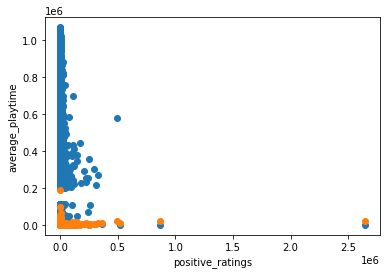

In [87]:
# Plot the positive_ratings & appid to find out if a linear trend exists

### BEGIN SOLUTION
plt.scatter(steam_data['positive_ratings'], steam_data['appid'])
plt.xlabel("positive_ratings")
plt.ylabel("appid")

plt.scatter(steam_data['positive_ratings'], steam_data['average_playtime'])
plt.xlabel("positive_ratings")
plt.ylabel("average_playtime")

Text(0, 0.5, 'average_playtime')

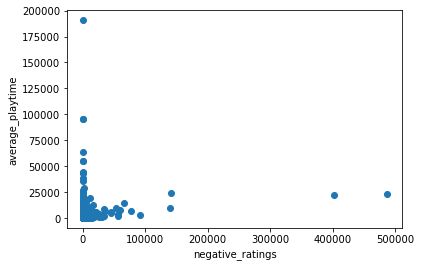

In [89]:

# Plot the negative_ratings & average_playtime to find out if a linear trend exists

### BEGIN SOLUTION
plt.scatter(steam_data['negative_ratings'], steam_data['average_playtime'])
plt.xlabel("negative_ratings")
plt.ylabel("average_playtime")


Text(0, 0.5, 'price')

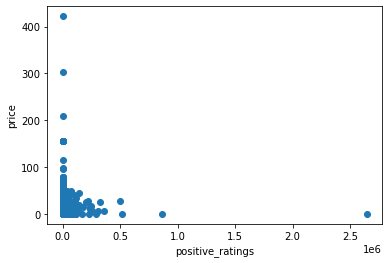

In [29]:
# Plot the negative_ratings & average_playtime to find out if a linear trend exists

### BEGIN SOLUTION
plt.scatter(steam_data['positive_ratings'], steam_data['price'])
plt.xlabel("positive_ratings")
plt.ylabel("price")

Text(0, 0.5, 'price')

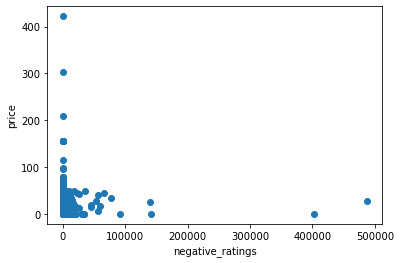

In [30]:
# Plot the negative_ratings & appid to find out if a linear trend exists

### BEGIN SOLUTION
plt.scatter(steam_data['negative_ratings'], steam_data['price'])
plt.xlabel("negative_ratings")
plt.ylabel("price")

In [33]:
import seaborn

In [52]:
#seaborn.PairGrid(steam_data).steam_data_upper(plt.scatter)

In [53]:
#team_data.positive_ratings.unique()

In [78]:
new_steam_data = steam_data.drop(["name","release_date","developer","publisher","platforms","categories","genres", "steamspy_tags", "owners"], axis =1)

In [79]:
new_steam_data.head()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
0,10,1,0,0,124534,3339,17612,317,7.19
1,20,1,0,0,3318,633,277,62,3.99
2,30,1,0,0,3416,398,187,34,3.99
3,40,1,0,0,1273,267,258,184,3.99
4,50,1,0,0,5250,288,624,415,3.99


In [ ]:
# add coloun for % ratings rated positive 

In [98]:
new_steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   english           27075 non-null  int64  
 2   required_age      27075 non-null  int64  
 3   achievements      27075 non-null  int64  
 4   positive_ratings  27075 non-null  int64  
 5   negative_ratings  27075 non-null  int64  
 6   average_playtime  27075 non-null  int64  
 7   median_playtime   27075 non-null  int64  
 8   price             27075 non-null  float64
dtypes: float64(1), int64(8)
memory usage: 1.9 MB


In [85]:
np.unique(y)

array([      0,       1,       2, ...,  515879,  863507, 2644404],
      dtype=int64)

In [110]:
# Split the data into X_train, X_test, y_train, y_test
y = new_steam_data['achievements'].values
X = new_steam_data.drop('achievements', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [111]:
# Train a Logistic Regression model print the model score
logistic_regression = LogisticRegression().fit(X_train, y_train)

print('LogisticRegression Training score: ', logistic_regression.score(X_train,y_train))
print('LogisticRegression Test score: ', logistic_regression.score(X_test, y_test))

LogisticRegression Training score:  0.4395745099970452
LogisticRegression Test score:  0.43300339784310826


C:\Users\VAIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
# ************does not work with positive ratings or price but no error with 'achievements' ***************

In [113]:
new_steam_data['achievements'].unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
27070     7
27071     0
27072    24
27073     0
27074     0
Name: achievements, Length: 27075, dtype: int64>

In [114]:
new_steam_data['price'].unique

<bound method Series.unique of 0        7.19
1        3.99
2        3.99
3        3.99
4        3.99
         ... 
27070    2.09
27071    1.69
27072    3.99
27073    5.19
27074    5.19
Name: price, Length: 27075, dtype: float64>

In [117]:
# Train a Random Forest Classifier model and print the model score
RandomForest_classifier = RandomForestClassifier(random_state=1)
RandomForest_classifier.fit(X_train, y_train)
print('RandomForestClassifier Training score: ', RandomForest_classifier.score(X_train,y_train))
print('RandomForestClassifier Test score: ', RandomForest_classifier.score(X_test,y_test))

RandomForestClassifier Training score:  1.0
RandomForestClassifier Test score:  0.374649135765992


In [118]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
# Train the Logistic Regression model on the scaled data and print the model score
scaled_logistic = LogisticRegression(
    solver='lbfgs',
    max_iter=100,
    random_state=1
)
scaled_logistic.fit(X_train_scaled, y_train)

print('Scaled LogisticRegression Training score: ', scaled_logistic.score(X_train_scaled, y_train))
print('Scaled LogisticRegression Test score: ',scaled_logistic.score(X_test_scaled, y_test))

C:\Users\VAIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scaled LogisticRegression Training score:  0.43868807249088937
Scaled LogisticRegression Test score:  0.43182153937066037


In [120]:
# Train a Random Forest Classifier model on the scaled data and print the model score
scaled_random_forest = RandomForestClassifier(random_state=0)
scaled_random_forest.fit(X_train_scaled, y_train)
print('Scaled RandomForestClassifier Training score: ', scaled_random_forest.score(X_train_scaled,y_train))
print('Scaled RandomForestClassifier Test score: ', scaled_random_forest.score(X_test_scaled, y_test))

Scaled RandomForestClassifier Training score:  1.0
Scaled RandomForestClassifier Test score:  0.37568326192938395
